In [ ]:
# import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
path="/content/drive/MyDrive/datasets/train.csv"
# on_bad_lines='skip'
df=pd.read_csv(path)
df.head(30)
#any copies of values removed
df=df.drop_duplicates()
df.head(30)
df[["Family Name","First Name"]]=df["Name"].str.split(',', n=1, expand=True)
df[["Title","Full Name"]]=df["First Name"].str.split('.', n=1, expand=True)
df["Full Name"]=df["Full Name"].str.strip()
df=df.drop("First Name",axis=1)
df=df.drop("Name",axis=1)
df[["Name","additional info"]]=df["Full Name"].str.split('(', n=1, expand=True)
df["additional info"]=df["additional info"].str.strip(')')
df=df.drop("Full Name",axis=1)
df["Name"]=df["Name"].str.lstrip(" ")

df[["First Name","Last Name"]]=df["Name"].str.split(' ', n=1, expand=True)
# df["First Name"]=df["First Name"].str.strip()
df["Last Name"]=df["Last Name"].str.strip('"')
# df=df.drop("Name",axis=1)
# df=df.drop("First Name",axis=1)
df["additional info"] = df["additional info"].replace(['nan', 'None', ''], 'Not provided')
df["additional info"] = df["additional info"].fillna("Not provided")
df["Last Name"] = df["Last Name"].replace(['nan', 'None', ''], 'Not provided')
df["Last Name"] = df["Last Name"].fillna("Not provided")
df=df.drop("Name",axis=1)
df=df.drop("Title",axis=1)
#all characters and alphabets removed from ticket numbers
df["Ticket"] = df["Ticket"].str.replace('[a-zA-Z]', '', regex=True)
df["Ticket"] = df["Ticket"].str.replace(r'[ ,./\\]', '', regex=True)
df.head(30)
df.shape
df.isnull().sum()
#missing ages replaced by mean for uniform distribution
avg=df["Age"].mean()
df["Age"]=df["Age"].fillna(avg)
# print(df["Age"])
df["Age"].mode()
df.isnull().sum()
df["Cabin"]=df["Cabin"].astype(str)
# for i in df["Cabin"]:
#   if len(i.split())>0:
#     df["Cabin"]=df["Cabin"].str.split().str[0]
df["Cabin"] = df["Cabin"].str.split().str[0]
df["Cabin"] = df["Cabin"].replace('nan', 'Missing')
df["Cabin"] = df["Cabin"].replace('None', 'Missing')
df["Cabin"]=df["Cabin"].fillna("Missing")
df["Cabin"]=df["Cabin"].str.strip(" ")

df["Embarked"] = df["Embarked"].replace('nan', 'Missing')
df["Embarked"] = df["Embarked"].replace('None', 'Missing')
df["Embarked"]=df["Embarked"].fillna("Missing")
# df[["Family Name","First Name"]]=df["Name"].str.split(',', n=1, expand=True)
# df[["Title","Remaining Name"]]=df["First Name"].str.split('.', n=1, expand=True)
# df=df.drop("First Name",axis=1)
# df=df.drop("Name",axis=1)
df.head(30)
df.isnull().sum()
df.head(30)
df["Survived"].value_counts()
df["Pclass"].value_counts()
df["Sex"].value_counts()
df["Embarked"].value_counts()
df.head(30)





,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Name,additional info,First Name,Last Name
0,1,0,3,male,22.000000,1,0,521171,7.2500,Missing,S,Braund,Not provided,Owen,Harris
1,2,1,1,female,38.000000,1,0,17599,71.2833,C85,C,Cumings,Florence Briggs Thayer,John,Bradley
2,3,1,3,female,26.000000,0,0,23101282,7.9250,Missing,S,Heikkinen,Not provided,Laina,Not provided
3,4,1,1,female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Lily May Peel,Jacques,Heath
4,5,0,3,male,35.000000,0,0,373450,8.0500,Missing,S,Allen,Not provided,William,Henry
5,6,0,3,male,29.699118,0,0,330877,8.4583,Missing,Q,Moran,Not provided,James,Not provided
6,7,0,1,male,54.000000,0,0,17463,51.8625,E46,S,McCarthy,Not provided,Timothy,J
7,8,0,3,male,2.000000,3,1,349909,21.0750,Missing,S,Palsson,Not provided,Gosta,Leonard
8,9,1,3,female,27.000000,0,2,347742,11.1333,Missing,S,Johnson,Elisabeth Vilhelmina Berg,Oscar,W
9,10,1,2,female,14.000000,1,0,237736,30.0708,Missing,C,Nasser,Adele Achem,Nicholas,Not provided


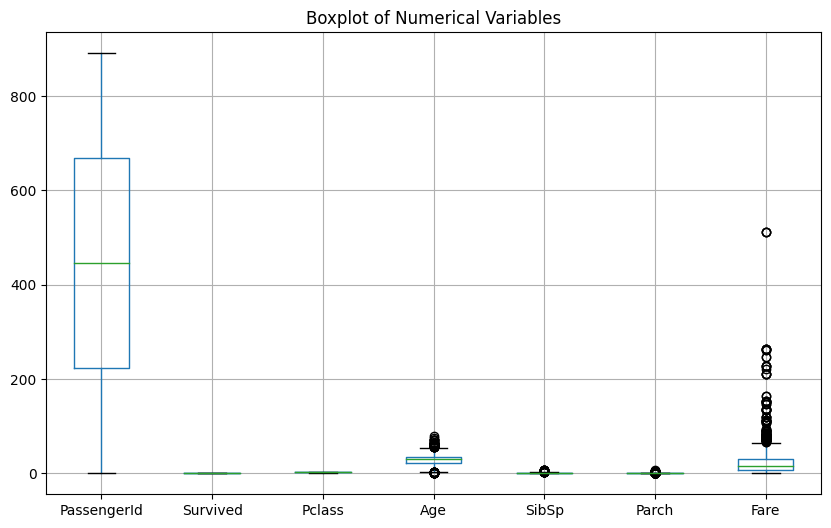

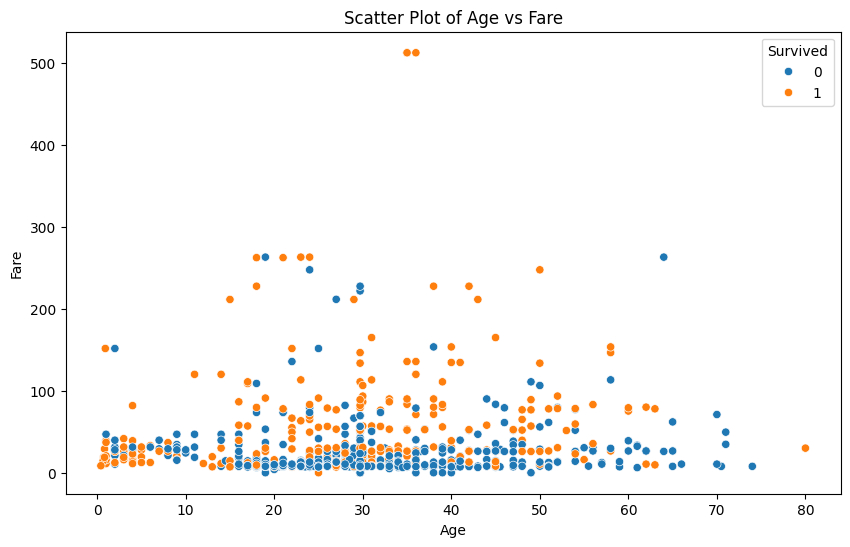

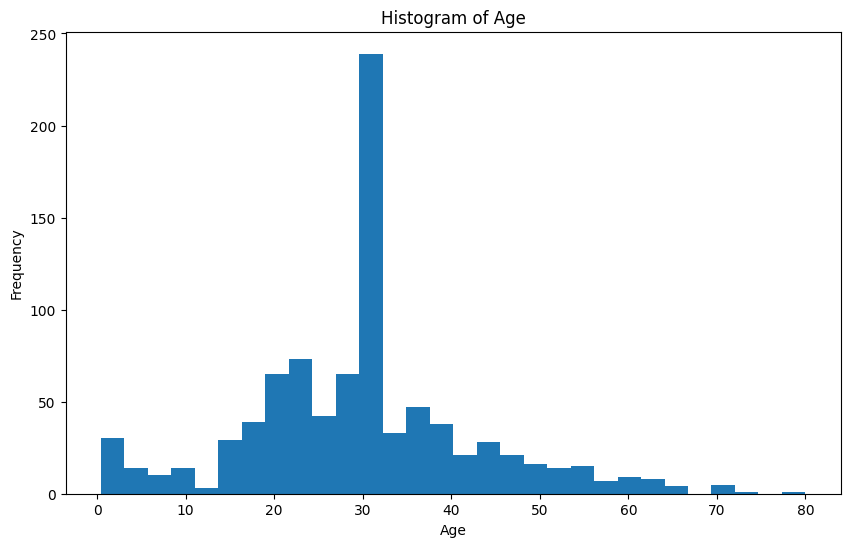

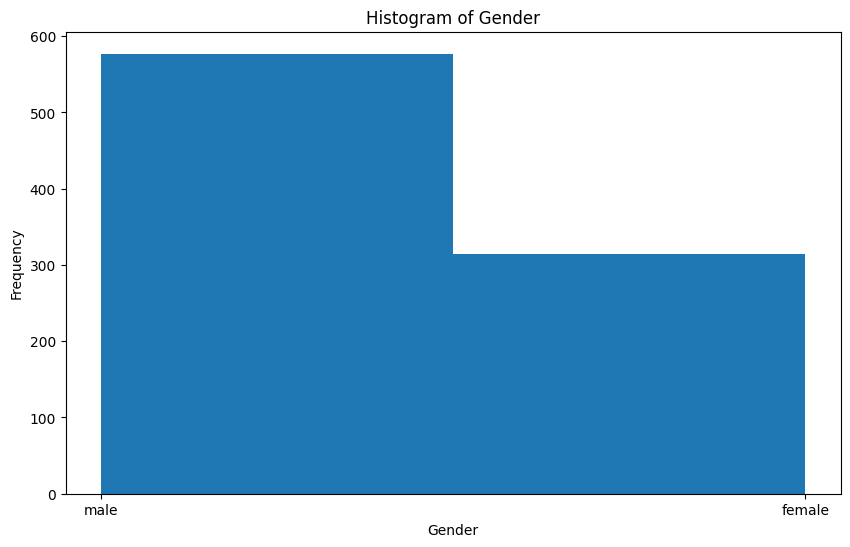

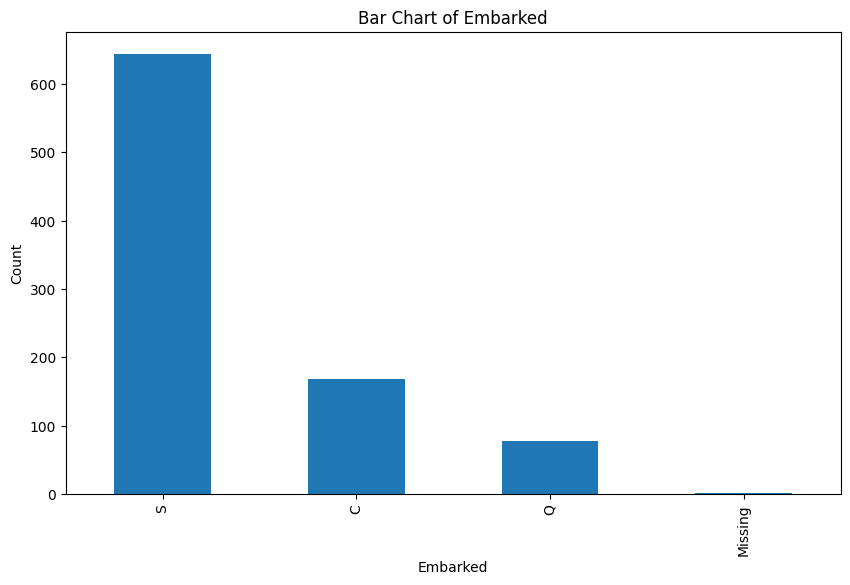

<BarContainer object of 891 artists>

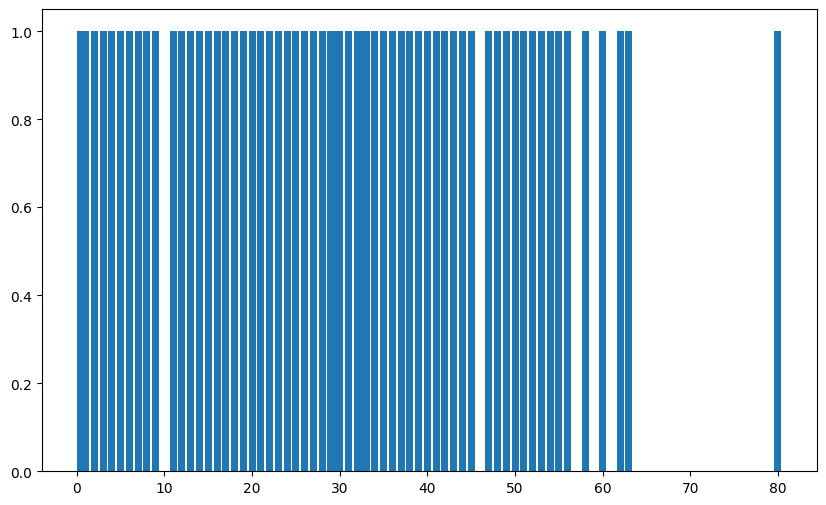

In [ ]:
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Boxplot of Numerical Variables')
plt.show()

# Scatter plot with Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Age"], y=df["Fare"], hue=df["Survived"])
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Histogram for age distribution
plt.figure(figsize=(10, 6))
plt.hist(df["Age"], bins=30)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#Histogram for sex distribution
plt.figure(figsize=(10, 6))
plt.hist(df["Sex"],bins=2)
plt.title('Histogram of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

#Barchart
plt.figure(figsize=(10, 6))
df["Embarked"].value_counts().plot(kind='bar')
plt.title('Bar Chart of Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

#Barchart
plt.figure(figsize=(10, 6))
plt.bar(df["Age"],df["Survived"])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive
